 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [50]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [51]:
# Reading whale returns
whale_returns_csv = Path("../Resources/whale_returns.csv")
whale_returns = pd.read_csv(
    whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns = whale_returns.sort_index()
whale_returns.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [52]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [53]:
# Drop nulls
whale_returns=whale_returns.dropna().copy()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [54]:
# Reading algorithmic retur
algo_returns_csv = Path("../Resources/algo_returns.csv")
algo_returns = pd.read_csv(
    algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns = algo_returns.sort_index()
algo_returns.head(10)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [55]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [56]:
# Drop nulls
algo_returns=algo_returns.dropna().copy()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [57]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../Resources/sp500_history.csv")
sp500_history = pd.read_csv(
    sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history = sp500_history.sort_index()
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [58]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [59]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace("$", "")
sp500_history["Close"] = sp500_history["Close"].str.replace(",", "")
sp500_history["Close"] = sp500_history["Close"].astype("float")
sp500_history.dtypes



C:\Users\Owner\AppData\Local\Temp\ipykernel_9228\1849616992.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history["Close"] = sp500_history["Close"].str.replace("$", "")


Close    float64
dtype: object

In [60]:
# Calculate Daily Returns
sp500_returns = sp500_history.pct_change()
sp500_returns.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [61]:
# Drop nulls
sp500_returns=sp500_returns.dropna().copy()
sp500_returns.isnull().sum()

Close    0
dtype: int64

In [62]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns = sp500_returns.rename(columns = {"Close":"sp500"})
sp500_returns.head()

,sp500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [63]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df_history = pd.concat([whale_returns, algo_returns, sp500_returns], axis="columns", join="inner")


df_history.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

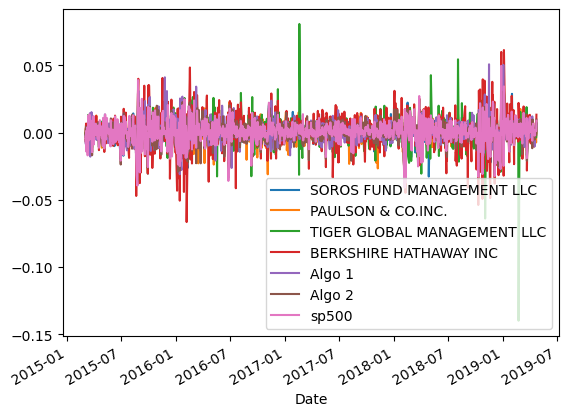

In [64]:
# Plot daily returns of all portfolios
df_history.plot()


#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative Returns of sp500 over the last six years'}, xlabel='Date'>

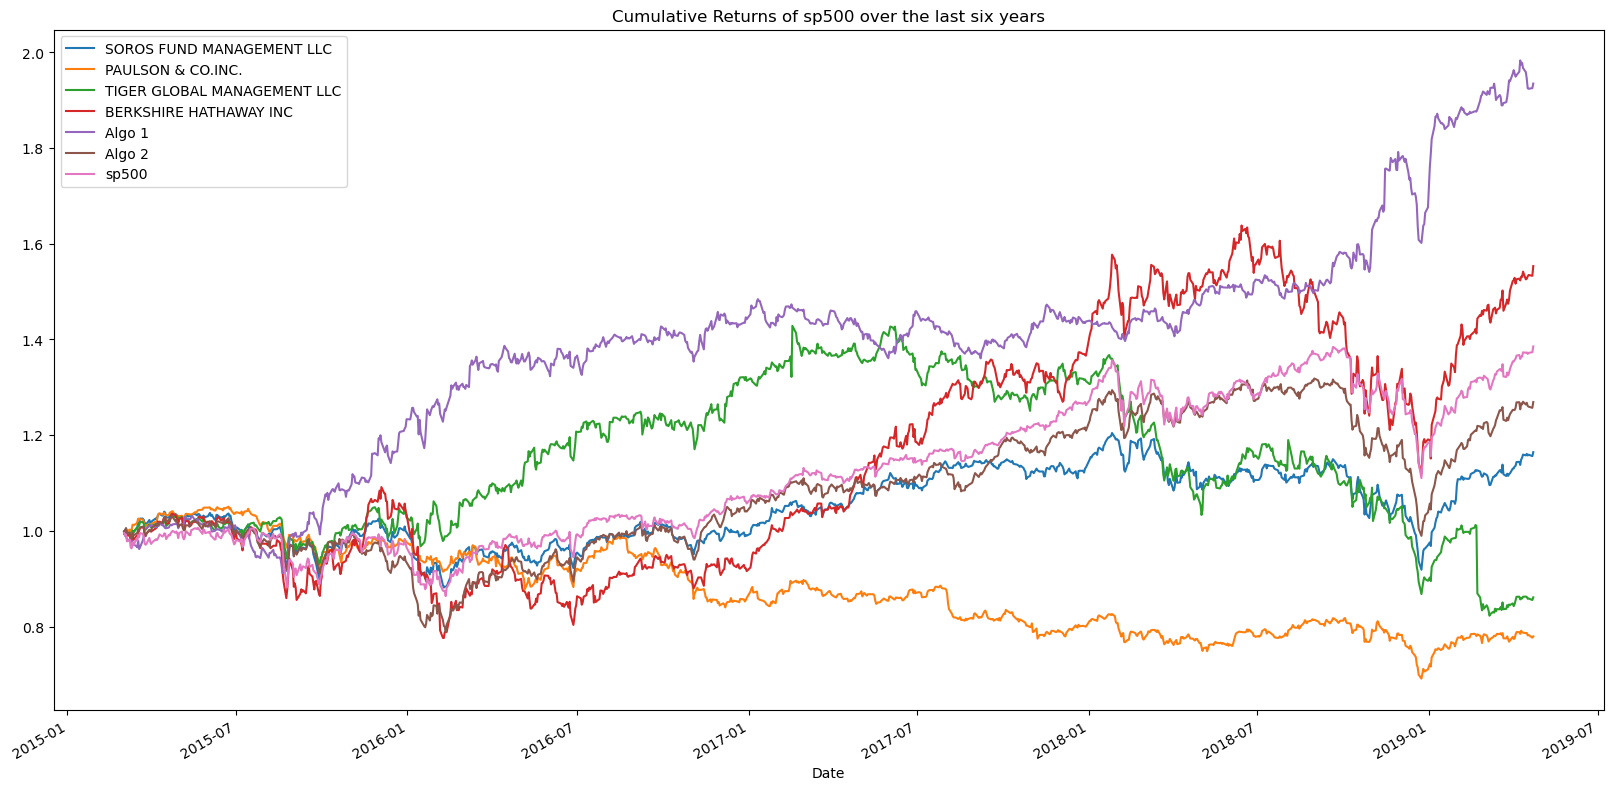

In [65]:
# Calculate cumulative returns of all portfolios
cum_returns = (1 + df_history).cumprod()
# Plot cumulative returns
cum_returns.plot(figsize=(20,10),title="Cumulative Returns of sp500 over the last six years")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

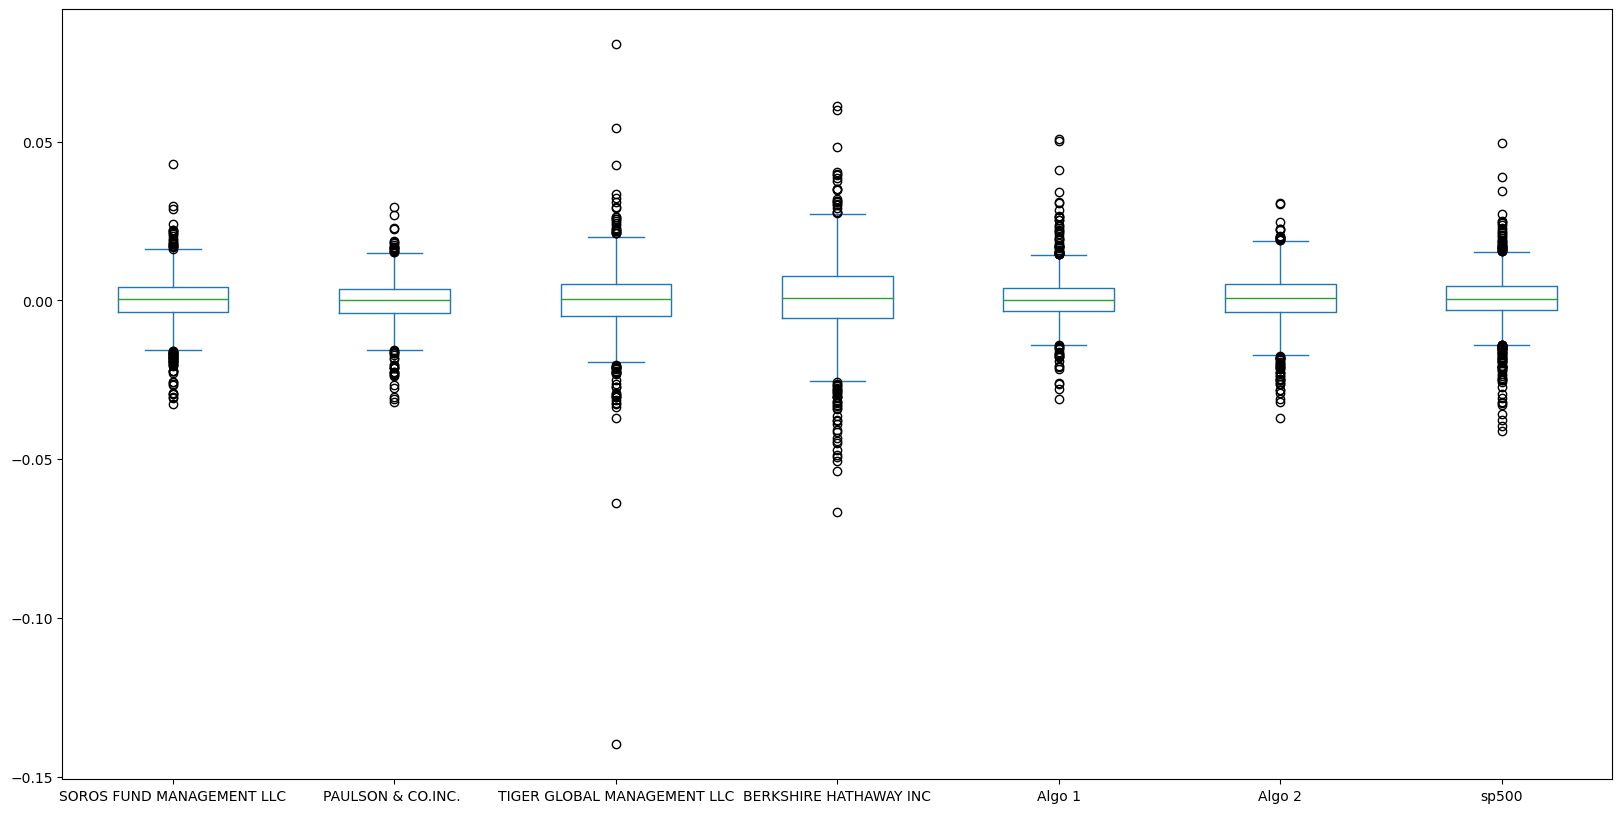

In [66]:
# Box plot to visually show risk
df_history.plot(kind ="box", figsize = (20,10))

### Calculate Standard Deviations

In [67]:
# Calculate the daily standard deviations of all portfolios
df_history.std()


SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
sp500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [68]:
# Calculate  the daily standard deviation of S&P 500
sp500_risk = df_history['sp500'].std()
# Determine which portfolios are riskier than the S&P 500

df_history.std() > sp500_risk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
sp500                          False
dtype: bool

### Calculate the Annualized Standard Deviation

In [69]:
# Calculate the annualized standard deviation (252 trading days)
df_annualized_std = df_history.std()*np.sqrt(252)
df_annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
sp500                          0.135786
dtype: float64

---

In [70]:
## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

SyntaxError: invalid syntax (2029859750.py, line 3)

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

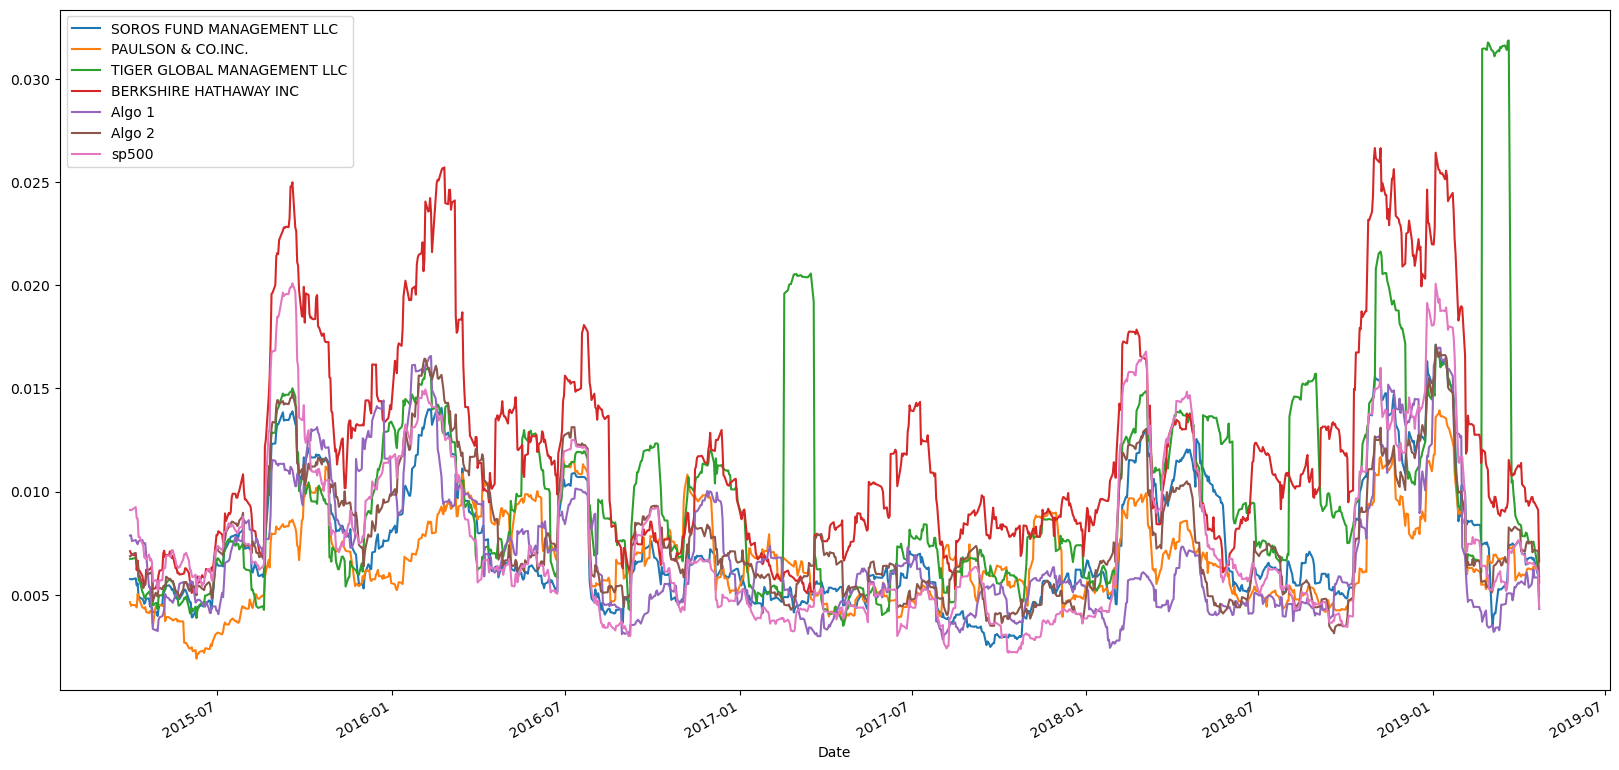

In [71]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
sp500_rolling_21 = df_history.rolling(window = 21).std()
sp500_rolling_21.plot(figsize = (20,10))
# Plot the rolling standard deviation


### Calculate and plot the correlation

In [72]:
# Calculate the correlation
df_correlation = df_history.corr()

# Display de correlation matrix
df_correlation.style.background_gradient(cmap="summer")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
sp500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: xlabel='Date'>

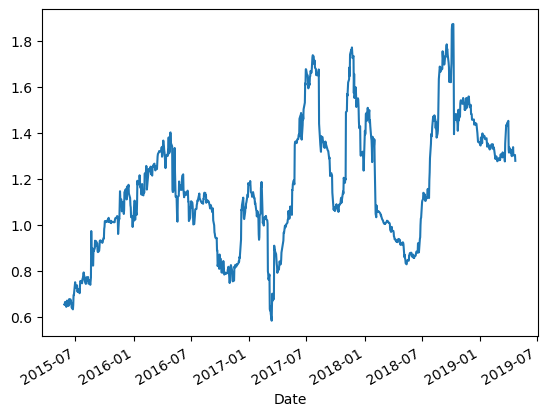

In [73]:
# Calculate covariance of a single portfolio
covariance = df_history['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(df_history['sp500'])
# Calculate variance of S&P 500
variance = df_history['sp500'].rolling(60).var()
# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: xlabel='Date'>

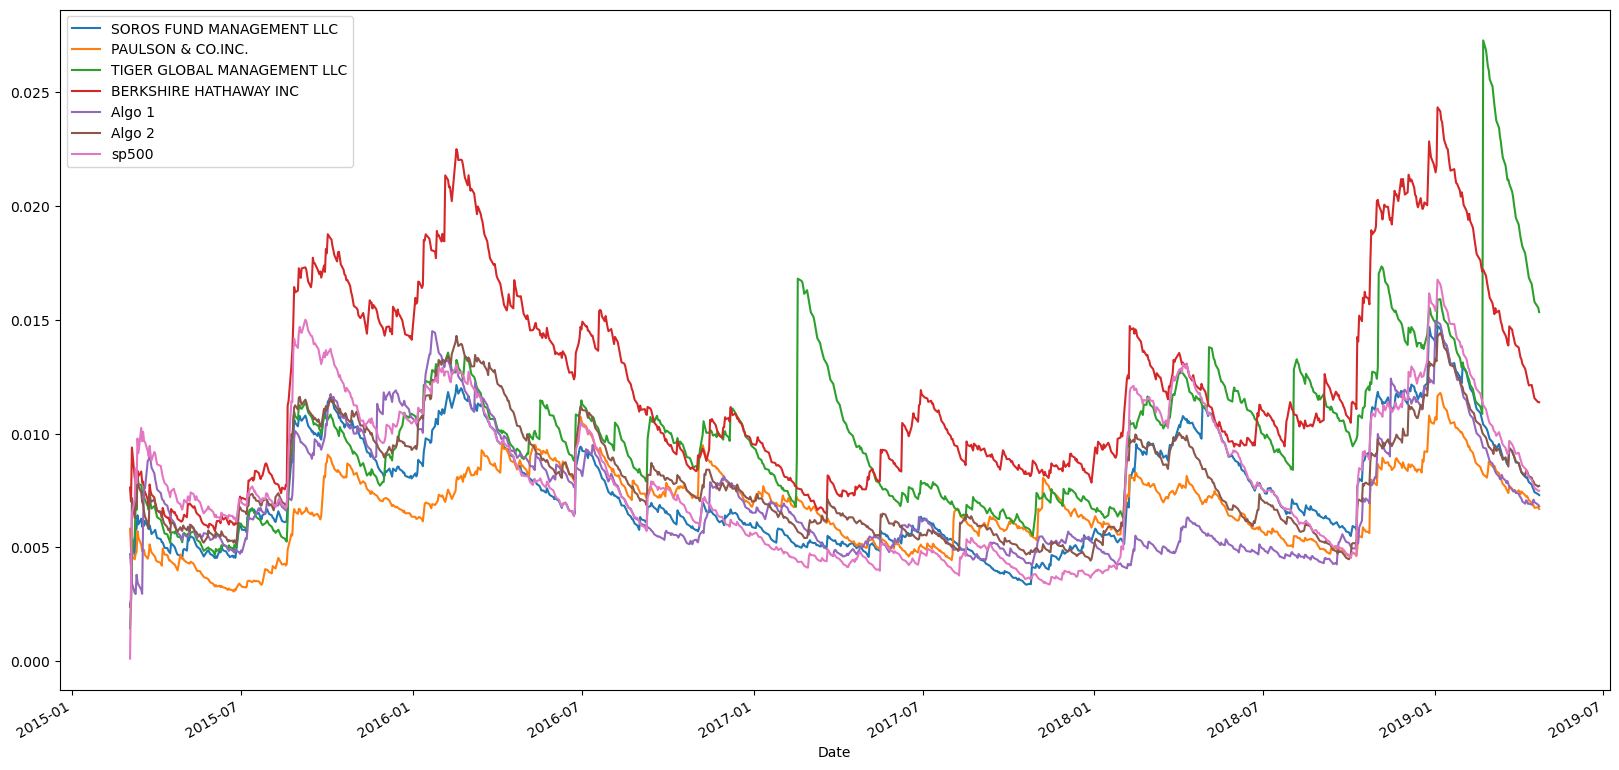

In [74]:
# Use `ewm` to calculate the rolling window
df_history.ewm(halflife=21).std().plot(figsize = (20,10))



---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [75]:
# Annualized Sharpe Ratios
sharpe_ratio = (df_history.mean() * 252) / (df_history.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500                          0.648267
dtype: float64

<Axes: >

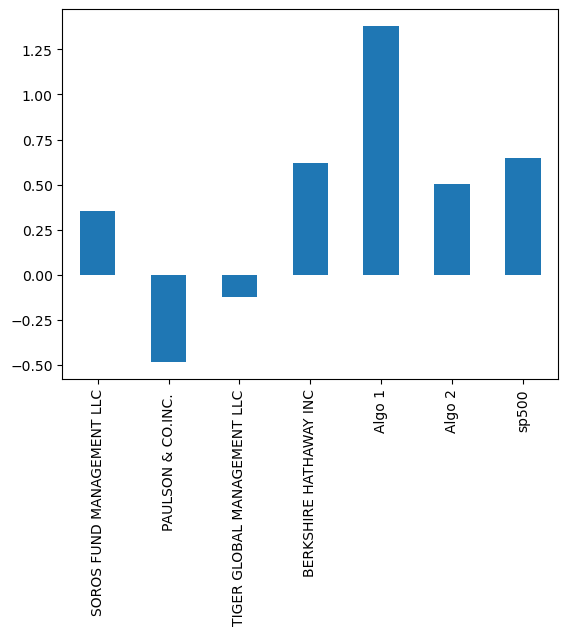

In [76]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar()


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [77]:
# Reading data from 1st stock
cost_path = Path('../Resources/cost_historical.csv')
cost_df = pd.read_csv(cost_path, index_col='Trade DATE',parse_dates=True,infer_datetime_format=True,)
cost_df = cost_df.sort_index()
cost_df.head()



,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [78]:
# Reading data from 2nd stock
aapl_path = Path('../Resources/aapl_historical.csv')
aapl_df = pd.read_csv(aapl_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
aapl_df = aapl_df.sort_index()
aapl_df.head()



,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [79]:

# Reading data from 3rd stock
goog_path = Path('../Resources/goog_historical.csv')
goog_df = pd.read_csv(goog_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
goog_df = goog_df.sort_index()
goog_df.head()


,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [80]:
# Combine all stocks in a single DataFrame
daily_stock = pd.concat([cost_df, aapl_df ,goog_df],axis='rows', join='inner') 
#daily_stock.columns = ['cost', 'aapl', 'goog', 'whale', 'algo', 'sp500']

daily_stock.head()




,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


# Reset Date index
combine_stocks.data_index('amzn', 'aapl', 'goog').reset()

In [81]:
daily_stock = daily_stock.reset_index()
daily_stock.head()

,Trade DATE,Symbol,NOCP
0,2018-05-11,COST,195.76
1,2018-05-14,COST,195.88
2,2018-05-15,COST,195.48
3,2018-05-16,COST,198.71
4,2018-05-17,COST,199.60


In [82]:
# Reorganize portfolio data by having a column per symbol
# daily_stock = daily_stock.pivot_table(value= 'NOCP', index="Trade DATE", columns="ALGO") 
portfolio = daily_stock.pivot_table(values='NOCP', index='Trade DATE', columns='Symbol')

portfolio.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [83]:

# Calculate daily returns
daily_returns = portfolio.pct_change()

# Drop NAs
daily_returns.dropna(inplace=True)
# Display sample data
daily_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [84]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return = daily_returns.dot(weights)
# Display sample data
portfolio_return.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [85]:
# Join your returns DataFrame to the original returns DataFrame
df_history['Custom'] = portfolio_return
df_history.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.011959


In [86]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
df_history = df_history.dropna().copy()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [87]:
# Calculate the annualized `std`
df_history.std()


SOROS FUND MANAGEMENT LLC      0.009240
PAULSON & CO.INC.              0.007353
TIGER GLOBAL MANAGEMENT LLC    0.014648
BERKSHIRE HATHAWAY INC         0.015569
Algo 1                         0.008423
Algo 2                         0.008791
sp500                          0.009578
Custom                         0.013323
dtype: float64

In [88]:
# Calculate the annualized standard deviation (252 trading days)
df_annualized_std = df_history.std()*np.sqrt(252)
df_annualized_std

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
sp500                          0.152054
Custom                         0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

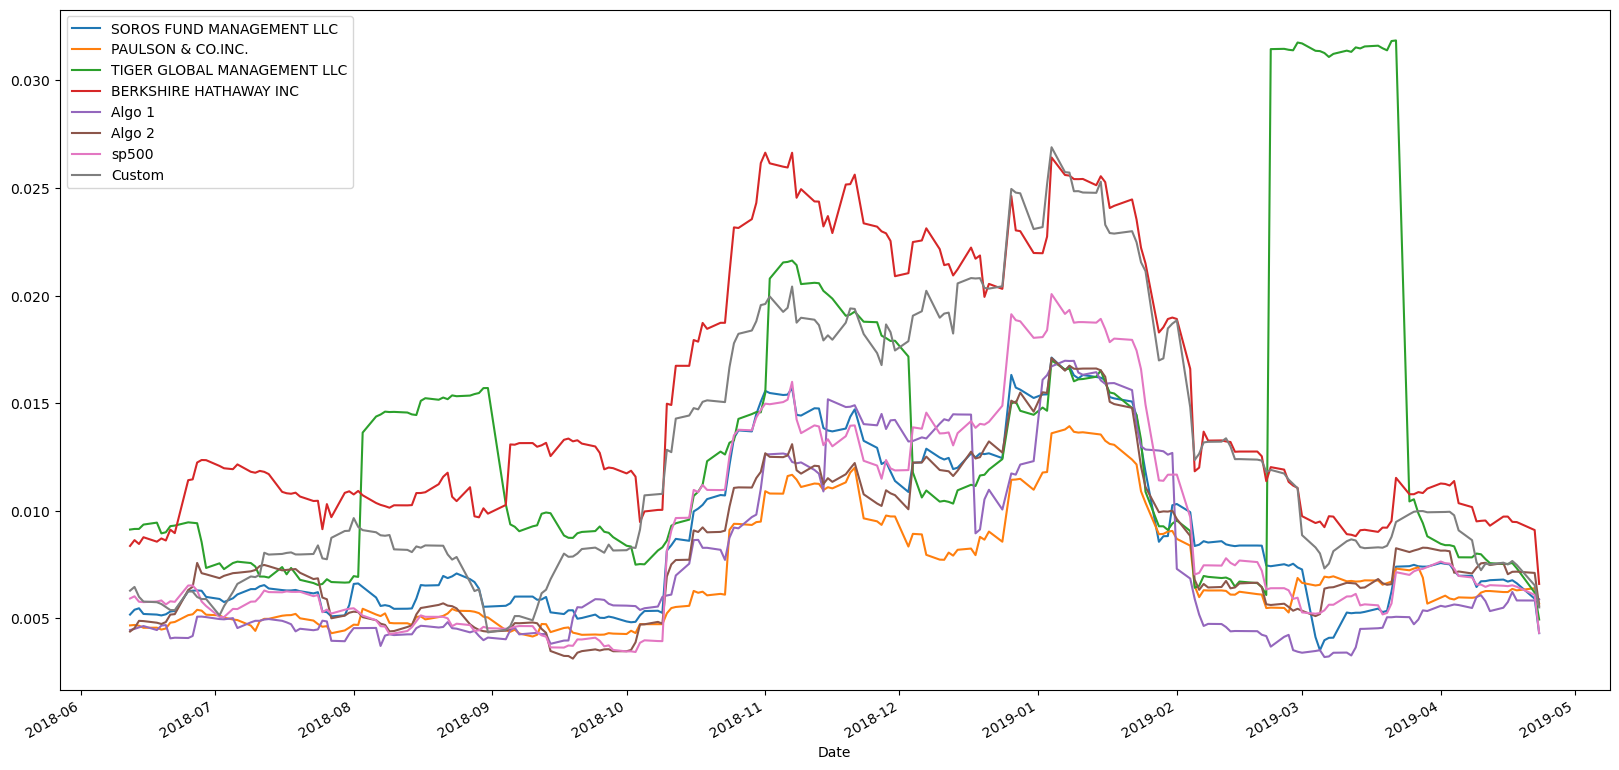

In [89]:
# Calculate rolling standard deviation
sp500_rolling_21 = df_history.rolling(window = 21).std()
sp500_rolling_21.plot(figsize = (20,10))
# Plot rolling standard deviation


### Calculate and plot the correlation

In [90]:
# Calculate and plot the correlation

df_history = df_correlation.corr()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: >

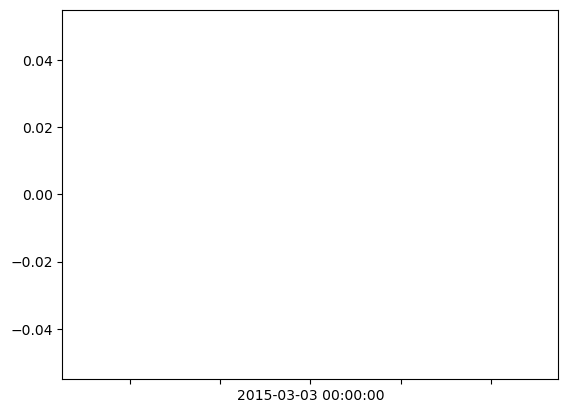

In [91]:
# Calculate and plot Beta
covariace = df_history['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(df_history['sp500'])
variance = df_history['sp500'].rolling(60).var()
beta = covariance / variance
beta.plot()


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [93]:
# Calculate Annualized Sharpe Ratio
sharp_ratio = (df_history.mean() * 252) / (df_history.std() * np.sqrt(252))
sharp_ratio


SOROS FUND MANAGEMENT LLC      14.479535
PAULSON & CO.INC.              11.710948
TIGER GLOBAL MANAGEMENT LLC     5.309605
BERKSHIRE HATHAWAY INC         12.944952
Algo 1                        -10.639462
Algo 2                         14.314427
sp500                          13.984965
dtype: float64

<Axes: >

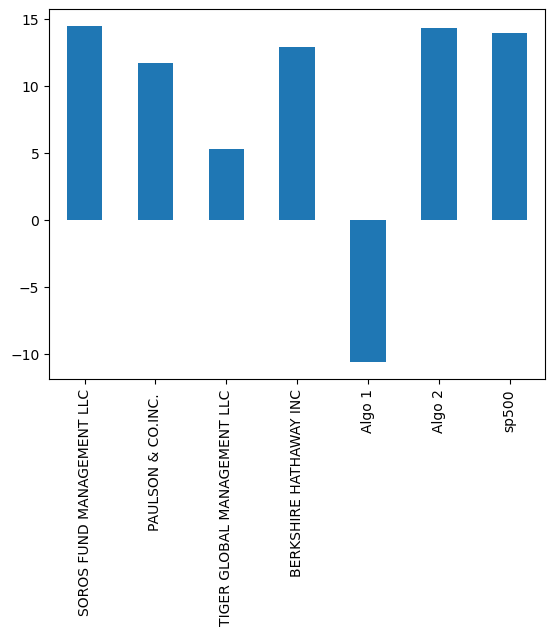

In [96]:
# Visualize the sharpe ratios as a bar plot
sharp_ratio.plot.bar()

### How does your portfolio do?

Write your answer here!